In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import scipy.stats as stats 
import warnings
import pylab 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_harvey_collier

warnings.filterwarnings("ignore")
%matplotlib inline

the r-squared is:  -92.28928671747127
the coefficient (value of a) for independent variables('gold', 'oil'), constant is:  [486.12945977 248.3574569  575.71356936]


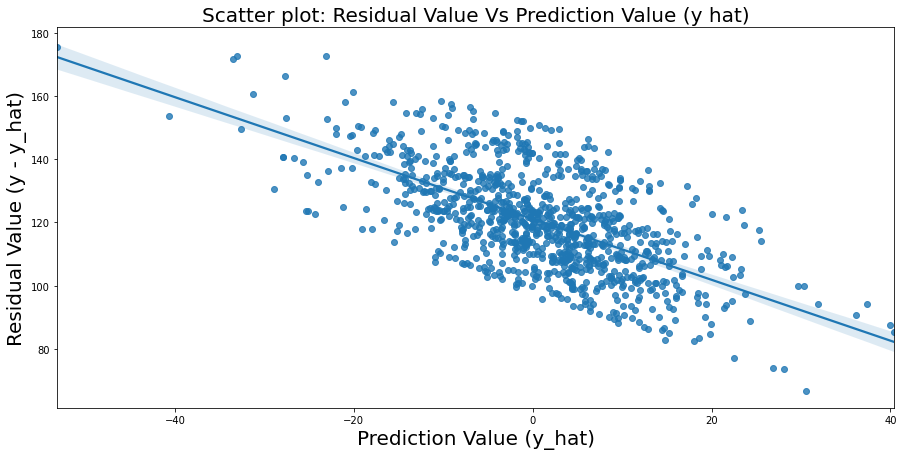

In [2]:
pdInputData = pd.read_excel("ProjectInputData.xlsx")
X = pdInputData[['gold', "oil", "JPM"]]
y = pdInputData['Close_ETF'] 
# Create a model y = b0 + b1x + b2x manually

def get_multilinear_best_fit_line(X, Y):
    # Use Linear Algebra to solve
    a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
    predictedY = np.dot(X, a)

    # calculate the r-squared
    SSres = Y - predictedY
    SStot = Y - Y.mean()
    rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
    print("the r-squared is: ", rSquared)
    print("the coefficient (value of a) for independent variables('gold', 'oil'), constant is: ", a)
    
    return predictedY, SSres

predictedY, SSres = get_multilinear_best_fit_line(X, y)

### # Plot Predict Vs Residual To Check Linearity  
plt.figure(figsize=(15,7))
sns.regplot(x=predictedY,y=SSres)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()

In [3]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

results = model.fit()
results.params

const    121.046690
gold      18.293780
oil       -2.101395
JPM       30.555632
dtype: float64

In [4]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,gold,oil,JPM
vif,1.065874,1.078647,1.033869


In [5]:
X = pdInputData[['oil' , 'gold']]
y = pdInputData['Close_ETF']
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)
results = model.fit()
results.params

const    121.142725
oil       -9.126100
gold      29.622592
dtype: float64

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Tue, 11 May 2021   Prob (F-statistic):              0.688
Time:                        23:26:01   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.000     120.360     121.925
oil           -9.1261     19.413     -0.470      0.638     -47.221      28.968
gold          29.6226     36.272      0.817      0.414     -41.555     100.800
==============================================================================
Omnibus:                       26.565   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.981
Skew:                           0.306   Prob(JB):                     1.02e-05
Kurtosis:                       2.579   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

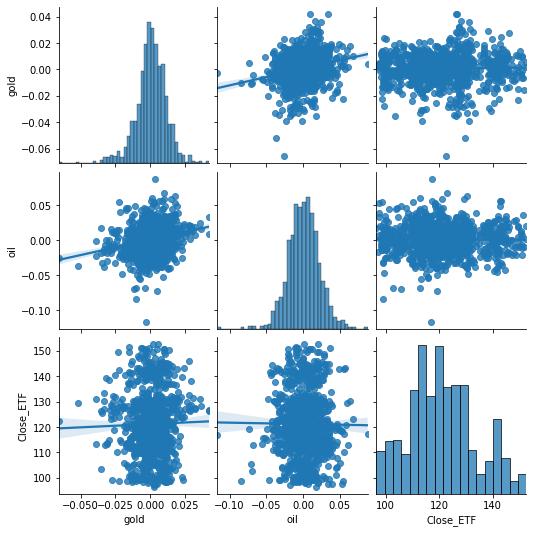

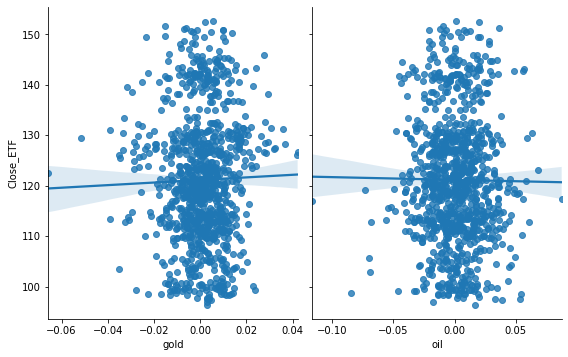

In [7]:
sns.pairplot(pdInputData[['gold', "oil", "Close_ETF"]], kind ='reg') 
sns.pairplot(pdInputData , x_vars=['gold', "oil"], y_vars=["Close_ETF"],
             height=5, aspect=.8, kind="reg")

Text(0.5, 0, 'Close_ETF')

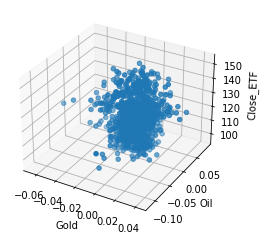

In [8]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:, 0], X[:, 1], Y)
ax.scatter(pdInputData['gold'], pdInputData["oil"], pdInputData['Close_ETF'])
ax.set_xlabel('Gold')
ax.set_ylabel('Oil')
ax.set_zlabel('Close_ETF')

In [9]:
y_pred = results.predict()
# multicolinearity/independence

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,oil,gold
vif,1.059952,1.059952


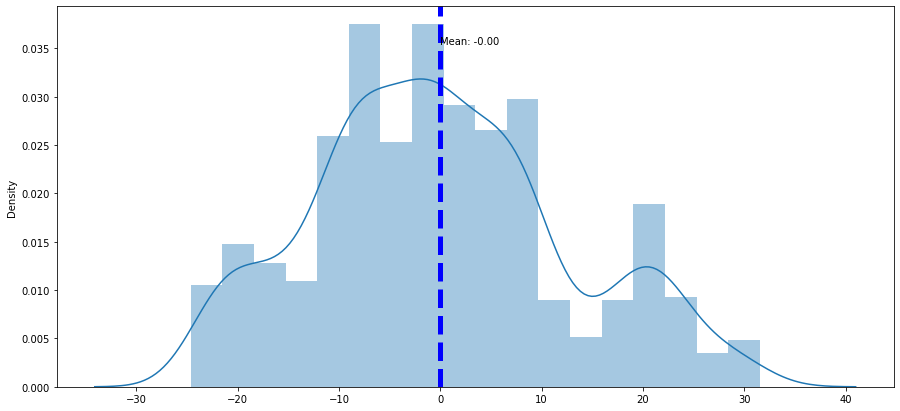

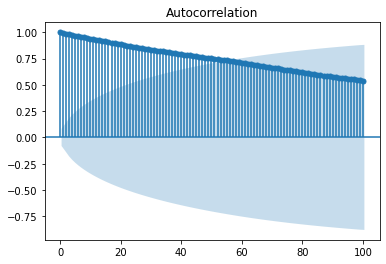

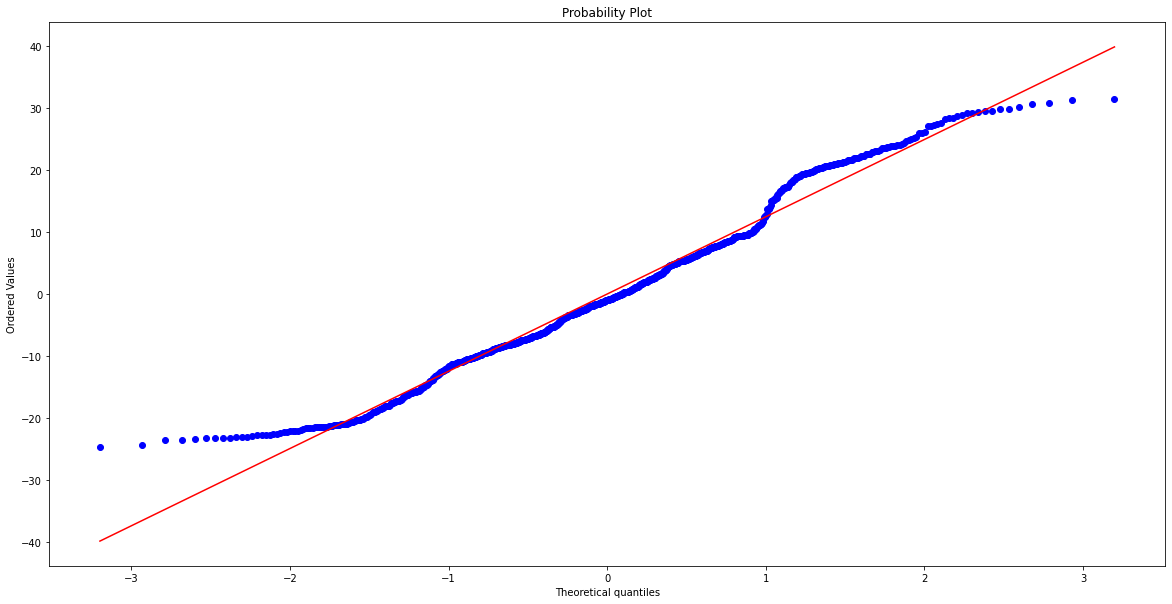

In [10]:
# normality of residuals 
plt.figure(figsize=(15,7))
serResidual = results.resid 
ax = sns.distplot(serResidual)
plt.axvline(np.mean(serResidual), color="b", linestyle="dashed", linewidth=5)
_, max_ = plt.ylim()
plt.text(        serResidual.mean() + serResidual.mean() / 10, max_ - max_ / 10, "Mean: {:.2f}".format(serResidual.mean()),
    )
acf = smt.graphics.plot_acf(serResidual, lags=100, alpha=0.01)

fig, ax = plt.subplots(figsize=(20,10))
_, (__, ___, r) = sp.stats.probplot(serResidual, plot=ax, fit=True)

In [11]:
np.mean(serResidual)

-8.185452315956354e-14

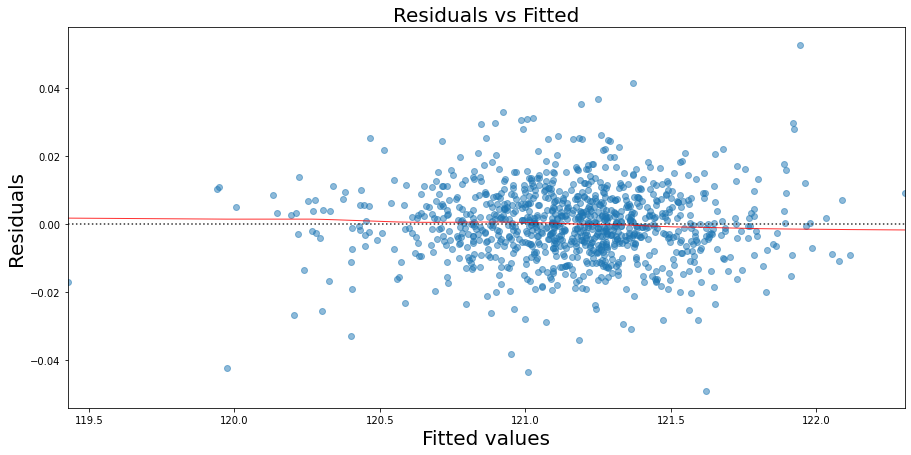

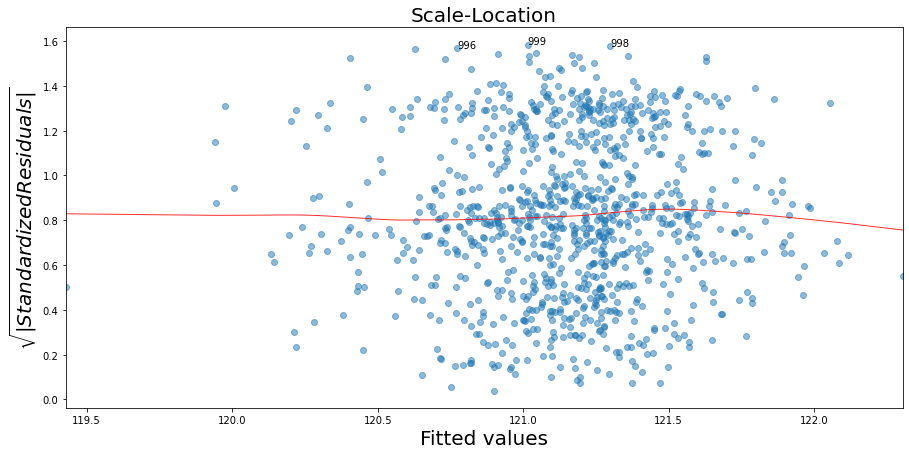

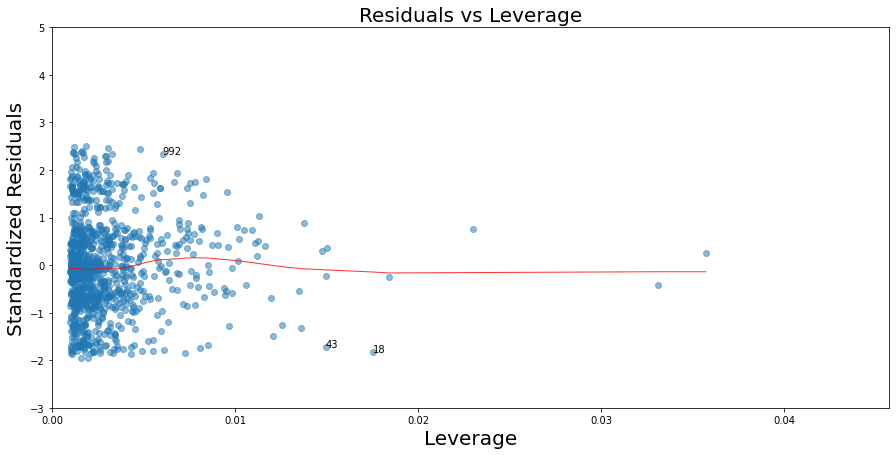

In [12]:
# Residuals vs Fitted
model_fitted_y = results.predict()
model_residuals = results.resid
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = results.get_influence().hat_matrix_diag
model_cooks = results.get_influence().cooks_distance[0]


plot_lm_1 = plt.figure(figsize=(15,7))
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, pdInputData.columns[-1], \
                          data=pdInputData,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted', size = 20)
plot_lm_1.axes[0].set_xlabel('Fitted values', size = 20)
plot_lm_1.axes[0].set_ylabel('Residuals', size = 20)


plot_lm_3 = plt.figure(figsize=(15,7))
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location', size = 20)
plot_lm_3.axes[0].set_xlabel('Fitted values', size = 20)
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$', size = 20);

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
#abs_norm_resid_top_3 = abs_norm_resid[:3]
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));
    
    
plot_lm_4 = plt.figure(figsize=(15,7))
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage', size = 20)
plot_lm_4.axes[0].set_xlabel('Leverage', size = 20)
plot_lm_4.axes[0].set_ylabel('Standardized Residuals', size = 20)

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]))